## Question 1
**Explain** the following question answer in detail:
> Q: You are doing full batch gradient descent using the entire training set (not stochastic gradient descent), Is it necessary to shuffle the training data? Explain your answer.

**A**:No, it is not necessary to shuffle the training data as in full batch gradient descent we take average of gradients of all training example in a single epoch and then update the parameters using this mean gradient.


## Question 2
Implement Gradient Descent in a Jupyter Notebook. Also explain in the same file how tuning each hyperparameter changes the outcome?


In [122]:
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
import pandas as pd
import sklearn.preprocessing as sk

In [132]:
def gradient_descent(x,y,parameters,types='mse',degree=1,iterations=10000,learning_rate=0.0001):
    w=parameters["W"]
    b=parameters["b"]
    print(w,b)
    costh=[]
    for i in range(iterations):
        if degree==1:
            y_pred=f(w,b,x)
        elif degree==2:
            y_pred=f2(w,b,x)
        if types=='mse':
            cost,dw,db=mse(x,y,y_pred)
        elif types=='mae':
            cost,dw,db=mae(x,y,y_pred)
        costh.append(cost)
        w-= learning_rate*dw
        b-= learning_rate*db
        if i%100==0:
            print(f"Iteration{i+1}: Cost {cost}, Weight {w}, Bias {b}")
    return w,b,costh

In [133]:
#for linear regression
def f(w,b,x):
    yy=np.dot(w,x)+b
    return yy
def f2(w,b,x):
    yy=np.dot(w,x**2)+b
    return yy
def mae(x,y,y_pred):
    n=x.shape[1]
    dwf= -1/n*np.sum(np.sign(y-y_pred)*x,axis=1)
    dbf= -1/n*np.sum(np.sign(y-y_pred))
    cost= np.sum(abs((y-y_pred))) / len(y)
    return cost,dwf,dbf

def mse(x,y,y_pred):
    n=x.shape[1]
    dwf=-2/n*np.dot(x,(y-y_pred).T)
    dbf=-1/n*np.sum(np.sign(y-y_pred))
    cost=np.sum((y-y_pred)**2) / len(y)
    return cost,dwf,dbf

In [134]:
np.random.seed(0)

In [139]:
def answer2():
    iter=400
    index=[i for i in range(1,iter+1)]
    # Data
    lr=[0,0.0001,0.0003,0.001,0.003,0.01]
    color=['red','blue','orange','green','brown','yellow']
    parameters={'W':np.random.randn(2,),'b':np.random.randn(1,)[0]}
    X = np.array([[0,1], [1,2], [2,2], [3,5], [4,8],[5,3], [6,4], [7,2], [8,9]]).T
    Y = np.array([0,1,3,2,1,8,9,13,8])
    figure, axis = plt.subplots(3, 1,figsize=(15,15))
    for i in range(6):
        # Estimating weight and bias using gradient descent
        W,b,costh1 = gradient_descent(X, Y,parameters,'mse',degree=1,iterations=iter,learning_rate=lr[i])
        print(f"Estimated Weight: {W}\nEstimated Bias: {b}")
        axis[0].plot(index,costh1,color=color[i])
        # Making predictions using estimated parameters
        Y_pred = f(W,b,X)
    axis[0].legend(lr)
    axis[0].set_title("mse")
    for i in range(6):
        # Estimating weight and bias using gradient descent
        W,b,costh2 = gradient_descent(X, Y,parameters,'mae',degree=1,iterations=iter,learning_rate=lr[i])
        print(f"Estimated Weight: {W}\nEstimated Bias: {b}")
        axis[1].plot(index,costh2,color=color[i])
        # Making predictions using estimated parameters
        Y_pred = f(W,b,X)
    axis[1].legend(lr)
    axis[1].set_title("mae")
    j=1
    W,b,costh1 = gradient_descent(X, Y,parameters,'mse',iterations=iter,learning_rate=lr[j])
    W,b,costh2 = gradient_descent(X, Y,parameters,'mae',iterations=iter,learning_rate=lr[j])
    axis[2].plot(index,costh1,color=color[0])
    axis[2].plot(index,costh2,color=color[1])
    axis[2].legend(['mse','mae'])
    axis[2].set_title("mae vs mse")
    #print(Y_pred)

[0.4105985  0.14404357] 1.454273506962975
Iteration1: Cost 14.171335687115356, Weight [0.4105985  0.14404357], Bias 1.454273506962975
Iteration101: Cost 14.171335687115356, Weight [0.4105985  0.14404357], Bias 1.454273506962975
Iteration201: Cost 14.171335687115356, Weight [0.4105985  0.14404357], Bias 1.454273506962975
Iteration301: Cost 14.171335687115356, Weight [0.4105985  0.14404357], Bias 1.454273506962975
Estimated Weight: [0.4105985  0.14404357]
Estimated Bias: 1.454273506962975
[0.4105985  0.14404357] 1.454273506962975
Iteration1: Cost 14.171335687115356, Weight [0.41291504 0.14467909], Bias 1.4542846180740863
Iteration101: Cost 10.735608199276983, Weight [0.59344251 0.16178153], Bias 1.4553957291852047
Iteration201: Cost 9.16556758453448, Weight [0.71270438 0.12690702], Bias 1.4533290625185373
Iteration301: Cost 8.040932464848163, Weight [0.803548   0.07266934], Bias 1.4499957291852044
Estimated Weight: [0.87920783 0.01321782]
Estimated Bias: 1.4466957291852047
[0.87920783 0.

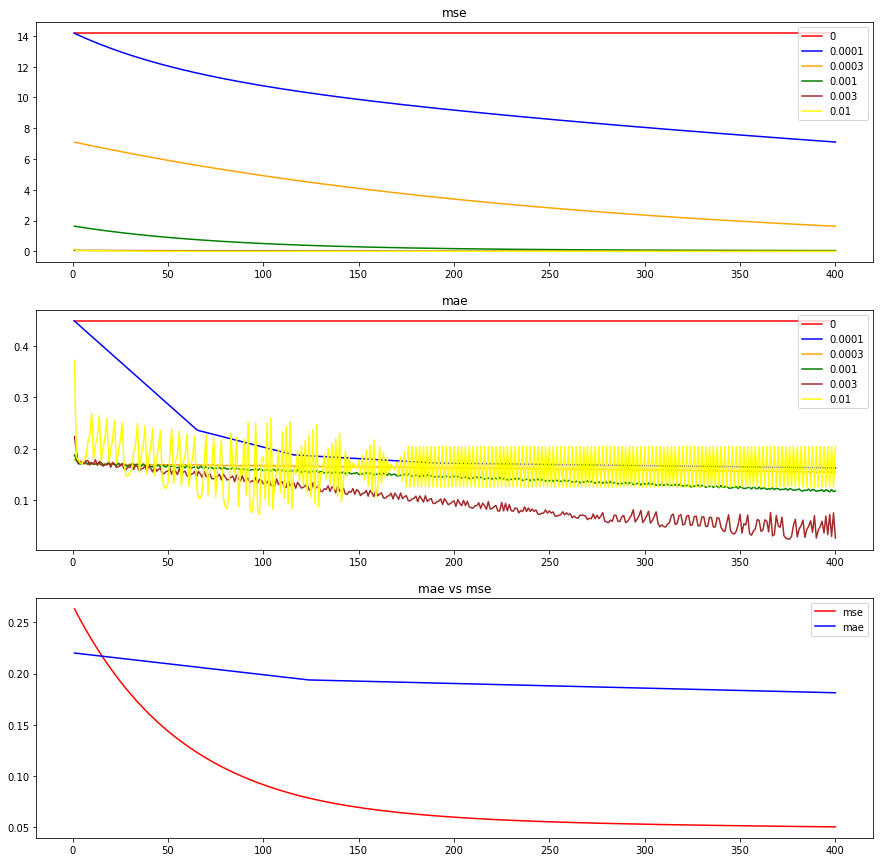

In [141]:
answer2()

Graph for loss function vs iteration for various value of alpha(look above)-
MSE-
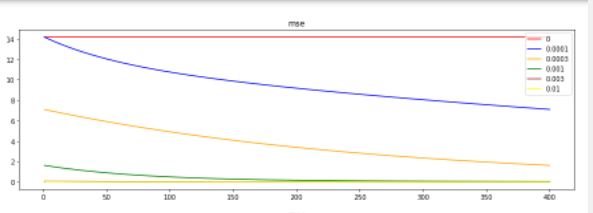

MAE-
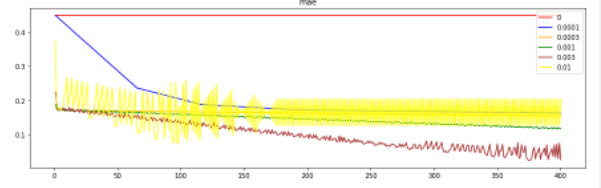

MSE VS MAE-
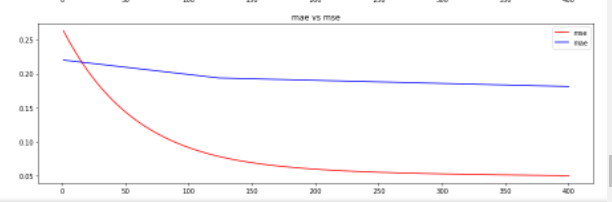

## Question 3
Go through first 2 chapters of ISLR. Now, explain Bias-Variance tradeoff in detail.

## Answer 3
Variance is a measurment of how the estimated function would change on small change in the training dataset.

Bias is a measurment of error that is introduced in our model due oversimplification of problem and using models with less flexibility.

Mathemathically-
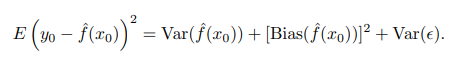

where LHS is the expected test MSE which we are trying to decrease.
First term is error due to variance and second term is error due to bias.

To decrease the expected error we need low variance and low bias.

Intuitively-

A model with high variance is usually highly flexible and is able to fit to trainig data perfectly. This results in modeling learning about coincidental patterns in error. - Overfitting 

While, a model with high bias has low flexibilty and is not able to learn the patterns in dataset effectively. - Underfitting

Thus it can be intuitively concluded too that we need low variance and low bias.

BUT-
variance increase as we increase flexibilty while bias follows just the reverse trend so its not possible to decrease both at same time. We need to find a 'trade-off' between them that mimises the MSE<sub>test</sub>.- bias-variance trade-off